# Cálculo Insertion Loss




In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def soma_dB(f):
    aux = 0
    for idx in f:
        aux=aux + (10**(idx/10))
    
    dB = 10*(np.log10(aux))
    return dB


In [120]:
#Definindo os eixos

#x_ticks = (20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000,5000, 6300, 8000, 10000, 12500, 16000, 20000)
x_ticks = (20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000)
y_ticks = np.arange(0, 70,5)

In [121]:
#Importando os dados 

data = pd.read_csv("Insertion_loss_ponto.CSV", delimiter= ";")
dt=np.array(data)
data

,freq,euc,cana,ban,coco,cafe,gesso
0,20.29,25.82,14.19,24.88,15.23,7.60,38.57
1,20.59,25.92,14.25,25.15,15.36,7.66,38.85
2,20.89,26.17,14.38,25.44,15.52,7.78,39.12
3,21.19,26.51,14.54,25.65,15.69,7.92,39.39
4,21.50,26.91,14.71,25.67,15.84,8.08,39.65
...,...,...,...,...,...,...,...
473,18780.24,54.67,56.46,45.43,51.01,51.75,60.36
474,19053.41,55.00,54.83,45.45,51.33,51.85,60.03
475,19330.55,55.21,53.23,45.65,51.69,52.06,59.74
476,19611.72,55.27,51.98,45.94,52.02,52.19,59.44


In [122]:
#dt[:,3]

In [123]:
#x_ticks = (20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000,5000, 6300, 8000, 10000, 12500, 16000, 20000)
x_ticks = (20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000)
y_ticks = np.arange(0, 70,5)

In [124]:
y = dt[:,0]
x_euc = dt[:,1]
x_cana = dt[:,2]
x_ban = dt[:,3]
x_coco = dt[:,4]
x_cafe = dt[:,5]
x_gesso = dt[:,6]

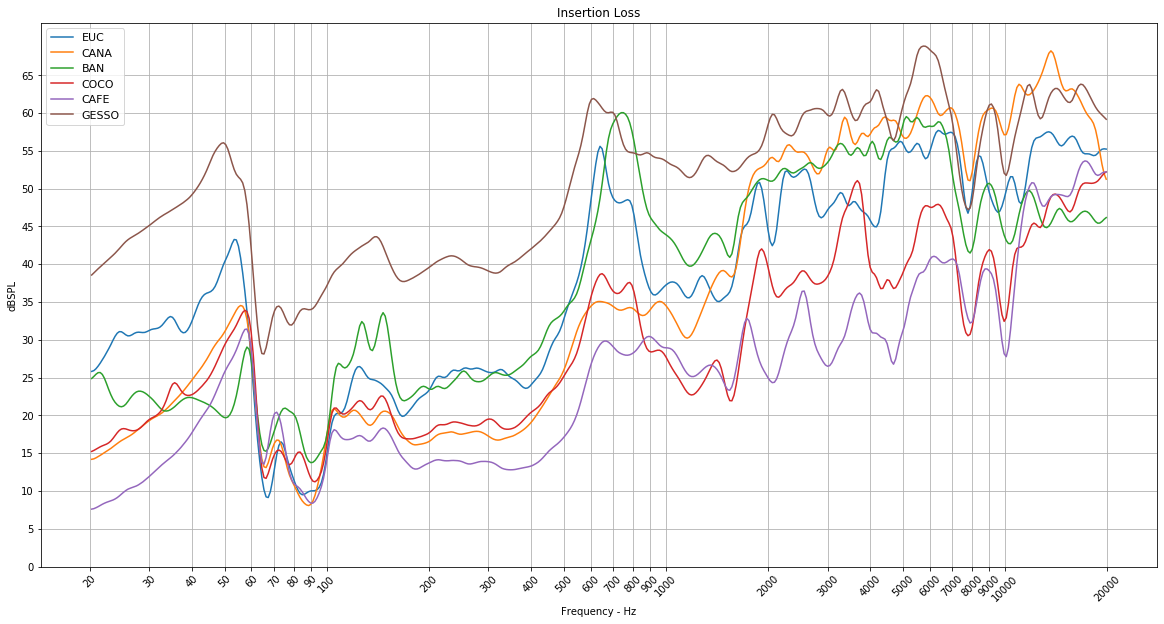

In [178]:
plt.figure(figsize=(20,10))
plt.xlabel('Frequency - Hz')
plt.ylabel('dBSPL')
plt.title('Insertion Loss')
plt.plot(y, x_euc,  label="EUC")
plt.plot(y, x_cana,  label="CANA")
plt.plot(y, x_ban,  label="BAN")
plt.plot(y, x_coco,  label="COCO")
plt.plot(y, x_cafe,  label="CAFE")
plt.plot(y, x_gesso,  label="GESSO")
plt.xscale('log')
plt.grid(axis='y')
plt.grid(axis='x')
plt.xticks(x_ticks, x_ticks, rotation='45')
plt.yticks(y_ticks)
plt.legend(fontsize=11)
plt.show()

# Frequências por oitavas(centro) e seus limites
####  44    63Hz       88      [54:101]
#### 88     125Hz      177     [102:149]
#### 177    250Hz       355     [150:198]
#### 355    500Hz       710     [199:246]
#### 710    1000Hz     1420    [247:249]
#### 1420   2000Hz     2840    [295:341]
#### 2840   4000Hz     5680    [342:390]
#### 5680   8000Hz     11360   [391:438]
#### 11360  16000Hz     22720   [439:]

In [179]:
def converte_oitava(vetor):  #acima de 63Hz
    aux=[]
    aux.append(soma_dB(vetor[54:101])) #63Hz
    aux.append(soma_dB(vetor[102:149])) #125Hz
    aux.append(soma_dB(vetor[150:198])) #250Hz
    aux.append(soma_dB(vetor[199:246])) #500Hz
    aux.append(soma_dB(vetor[247:249])) #1000Hz
    aux.append(soma_dB(vetor[295:341])) #2000Hz
    aux.append(soma_dB(vetor[342:390])) #4000Hz
    aux.append(soma_dB(vetor[391:438])) #8000Hz
    aux.append(soma_dB(vetor[439:])) #16000Hz
    return aux

In [180]:
def reduz_dimensão(matriz):
    m_aux=[]
    for line in matriz:
        m_aux.append(converte_oitava(np.array(line)))
    return np.array(m_aux)

In [181]:
x_euc8 = converte_oitava(x_euc)
x_cana8 = converte_oitava(x_cana)
x_ban8 = converte_oitava(x_ban)
x_coco8 = converte_oitava(x_coco)
x_cafe8 = converte_oitava(x_cafe)
x_gesso8 = converte_oitava(x_gesso)

In [186]:
x_ticks8 = (63,125,250,500,1000,2000,4000,8000,16000)
y_ticks8 = np.arange(25, 90,5)

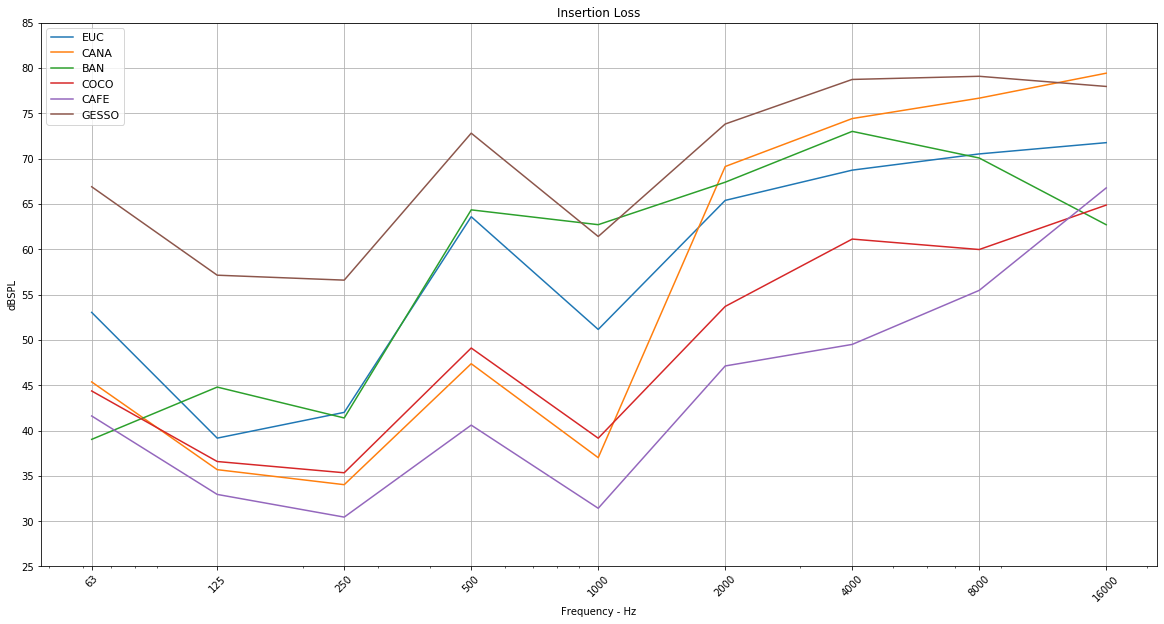

In [194]:
plt.figure(figsize=(20,10))
plt.xlabel('Frequency - Hz')
plt.ylabel('dBSPL')
plt.title('Insertion Loss')
plt.plot(x_ticks8, x_euc8, label="EUC")
plt.plot(x_ticks8, x_cana8,  label="CANA")
plt.plot(x_ticks8, x_ban8,  label="BAN")
plt.plot(x_ticks8, x_coco8,  label="COCO")
plt.plot(x_ticks8, x_cafe8,  label="CAFE")
plt.plot(x_ticks8, x_gesso8,  label="GESSO")
plt.xscale('log')
plt.grid(axis='y')
plt.grid(axis='x')
plt.xticks(x_ticks8, x_ticks8, rotation='45')
plt.yticks(y_ticks8)
plt.legend(fontsize=11)
plt.show()

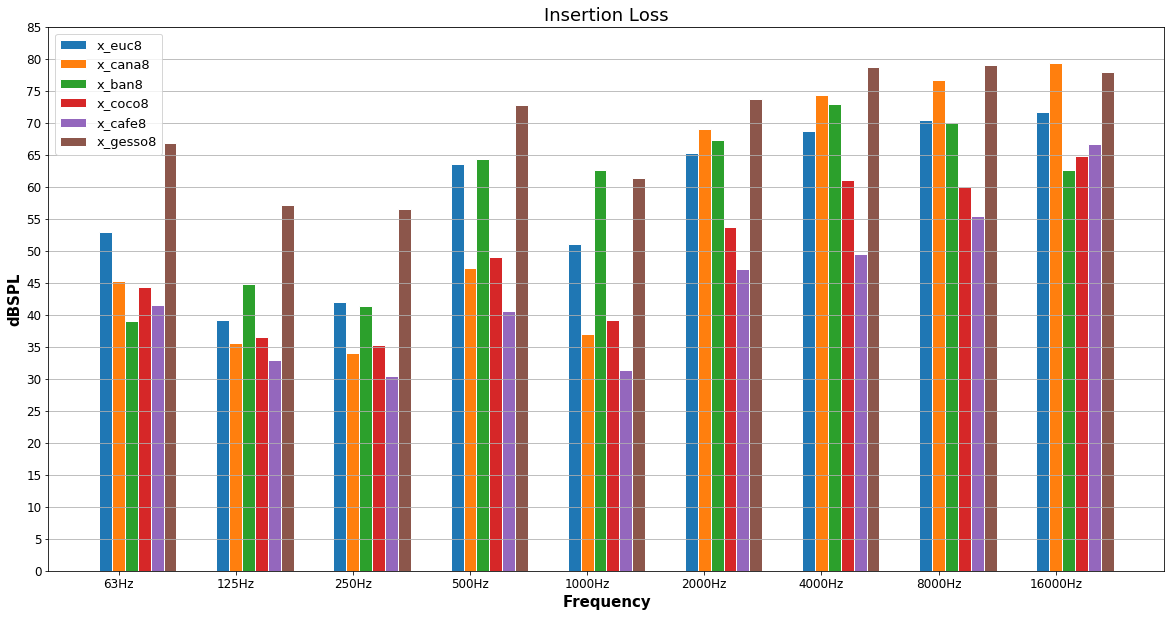

In [232]:
# set width of bar
barWidth = 0.11
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(x_euc8))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

 
# Make the plot
plt.figure(figsize=(20,10))
plt.bar(r1, x_euc8, width=barWidth, edgecolor='white', label='x_euc8')
plt.bar(r2, x_cana8,  width=barWidth, edgecolor='white', label='x_cana8')
plt.bar(r3, x_ban8,  width=barWidth, edgecolor='white', label='x_ban8')
plt.bar(r4, x_coco8,  width=barWidth, edgecolor='white', label='x_coco8')
plt.bar(r5, x_cafe8,  width=barWidth, edgecolor='white', label='x_cafe8')
plt.bar(r6, x_gesso8,  width=barWidth, edgecolor='white', label='x_gesso8')
 
# Add xticks on the middle of the group bars
plt.xlabel('Frequency',fontsize=15, fontweight='bold')
plt.xticks([r + barWidth for r in range(len(x_euc8))], ['63Hz', '125Hz', '250Hz', '500Hz', '1000Hz','2000Hz', '4000Hz', '8000Hz','16000Hz'],fontsize=12)
plt.grid(axis='y')
plt.yticks(np.arange(0, 90,5),fontsize=12)
#plt.grid(axis='x') 
plt.ylabel('dBSPL' ,fontsize=15 , fontweight='bold')
plt.title('Insertion Loss' ,fontsize=18)
plt.legend(fontsize=13)
plt.show()
